<a href="https://colab.research.google.com/github/RealMyeong/Aiffel_DataThon/blob/main/personal/DataThon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [506]:
#필요한 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [507]:
data_path = '/content/drive/MyDrive/DataThon/'

data = pd.read_csv(data_path+'Stores.csv')

In [508]:
data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


## 데이터 종류

  - Store ID : (index) 매장 번호
  - Store Area : 매장 크기
  - Items_Available : 판매가능한 품목 수  
  - Daily_Customer_Count : 월 별 일일 평균 방문자 수
  - Store_Sales : 매출

결측치 확인

In [509]:
data.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

결측치 없는것을 볼 수 있음

In [510]:
data.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


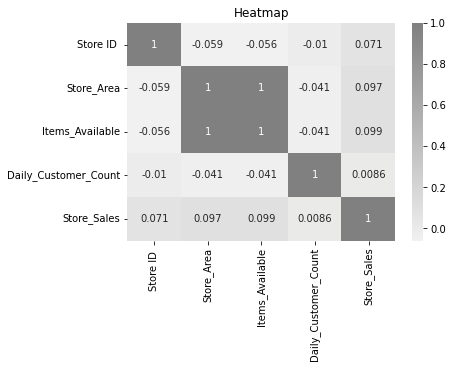

In [511]:
sns.heatmap(data.corr(), cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True)
plt.title("Heatmap")
plt.show()

히트맵을 봤을 때 Store_Area와 Items_Available이 서로 상관관계가 1이기 때문에 둘 중 하나는 drop시켜야 할 것 같다.

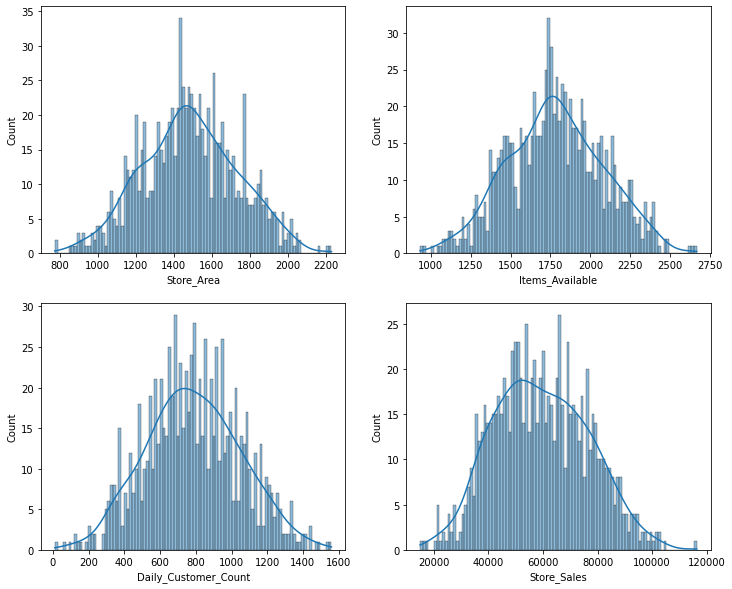

In [512]:
f, ax = plt.subplots(2, 2, figsize=(12,10))
sns.histplot(data['Store_Area'], kde=True,  bins=100, ax=ax[0,0])
sns.histplot(data['Items_Available'], kde=True, bins=100, ax=ax[0,1])
sns.histplot(data['Daily_Customer_Count'], kde=True, bins=100, ax=ax[1,0])
sns.histplot(data['Store_Sales'], kde=True, bins=100, ax=ax[1,1])
plt.show()

정규분포와 비슷한 모양을 보이기 때문에 따로 왜도, 첨도에 대해서는 따로 게산할 필요가 없지 않을까..?

In [513]:
# 왜도

def skewness_self(inp):
    # 길이
    len_inp = len(inp)
    result = 0
    for i in inp:
        result += ((i - np.mean(inp)) / np.std(inp)) ** 3
    result = result / len_inp
    return result


# 첨도

def kurtosis_self(inp):
    # 길이
    len_inp = len(inp)
    result = 0
    for i in inp:
        result += ((i - np.mean(inp)) / np.std(inp)) ** 4
    result = (result / len_inp) - 3
    return result

In [514]:
columns = ['Store_Area', 'Store_Sales', 'Daily_Customer_Count', 'Items_Available']
skew = []
for col in columns:
  skew.append(skewness_self(data[col]))

In [515]:
skew

[0.03031600193763059,
 0.1485444304822789,
 0.07450778647414659,
 0.03438170966276822]

In [516]:
kurtosis = []
for col in columns:
  kurtosis.append(kurtosis_self(data[col]))

kurtosis

[-0.2876592278587049,
 -0.46026391920135223,
 -0.26499295536247436,
 -0.28621267587195254]

|왜도| < 3 , |첨도| <7 이므로 기준에 부합하는 데이터라고 볼 수 있다.

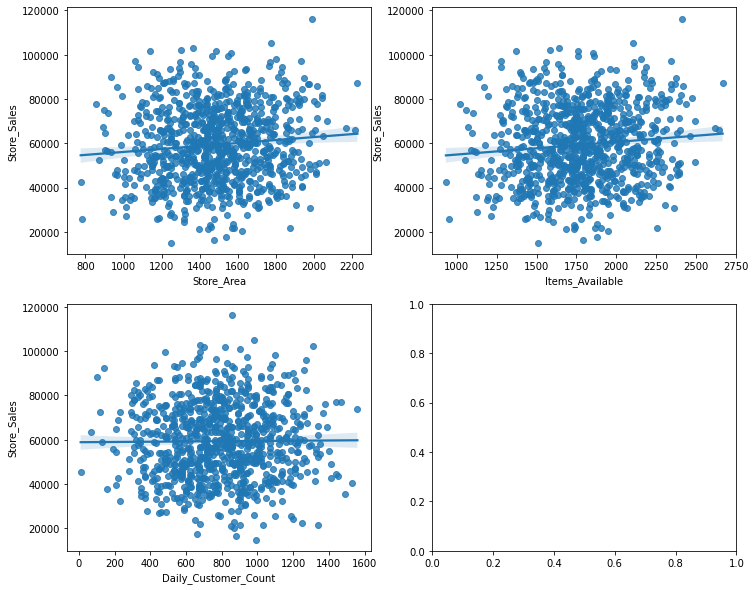

In [517]:
f, ax = plt.subplots(2,2,figsize=(12,10))
sns.regplot(x=data['Store_Area'], y=data['Store_Sales'], ax=ax[0,0])
sns.regplot(x=data['Items_Available'], y=data['Store_Sales'], ax=ax[0,1])
sns.regplot(x=data['Daily_Customer_Count'], y=data['Store_Sales'], ax=ax[1,0])
plt.show()

In [518]:
data['Area_level']=pd.qcut(data['Store_Area'],6)
data.groupby(['Area_level'])['Store_Sales'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Store_Sales
Area_level,
"(774.999, 1229.167]",56932.066667
"(1229.167, 1381.333]",59537.382550
"(1381.333, 1477.0]",58028.066667
"(1477.0, 1587.333]",59051.081081
"(1587.333, 1744.833]",60186.644295
"(1744.833, 2229.0]",62375.400000


In [519]:
data['Area_Class'] = 1
data.loc[data['Store_Area']<1229.167, 'Area_Class'] = 6
data.loc[(data['Store_Area']>=1229.167)&(data['Store_Area']<1381.333), 'Area_Class'] = 5
data.loc[(data['Store_Area']>=1381.333)&(data['Store_Area']<1477.0), 'Area_Class'] = 4
data.loc[(data['Store_Area']>=1477.0)&(data['Store_Area']<1587.333), 'Area_Class'] = 3
data.loc[(data['Store_Area']>=1587.333)&(data['Store_Area']<1744.833), 'Area_Class'] = 2
data.loc[(data['Store_Area']>=1744.833)&(data['Store_Area']<2229), 'Area_Class'] = 1

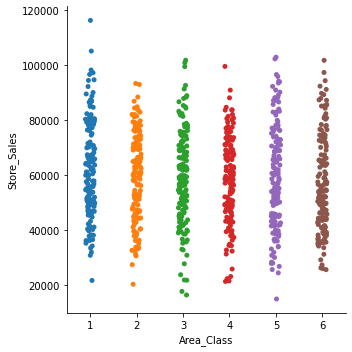

In [520]:
sns.catplot(x='Area_Class',y='Store_Sales',  data=data, kind='strip')

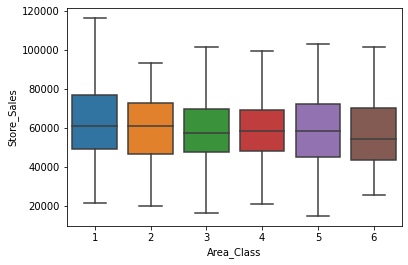

In [521]:
sns.boxplot(x='Area_Class', y='Store_Sales', data=data)

In [522]:
#단위 넓이 당 품목수

data['Items_per_Area'] = data['Items_Available']/data['Store_Area']

#단위 넓이 당 손님수

data['Customer_per_Area'] = data['Daily_Customer_Count']/data['Store_Area']

In [523]:
# 월 평균 이용 고객

data['Monthly_Customer_Count'] = data['Daily_Customer_Count'] * 30

# 1인 평균 사용 금액

data['Sales_per_Customer'] = data['Store_Sales'] / data['Monthly_Customer_Count']

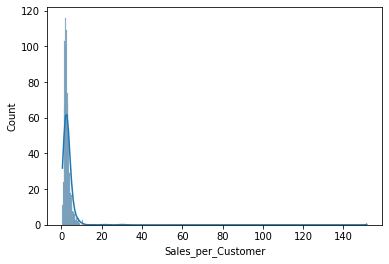

In [524]:
sns.histplot((data['Sales_per_Customer']), kde=True)

In [525]:
#log 처리
data['Sales_per_Customer']=np.log(data['Sales_per_Customer'])

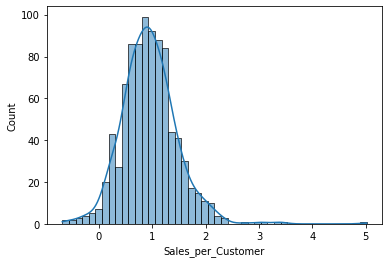

In [526]:
sns.histplot(data['Sales_per_Customer'], kde=True)

In [527]:
# 고객 1인당 구매 가능한 품목 개수
data['Items_per_Customers'] = data['Items_Available']/data['Daily_Customer_Count']

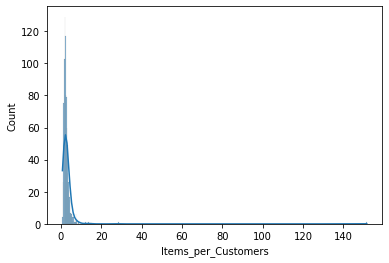

In [528]:
sns.histplot(data['Items_per_Customers'], kde=True)

In [529]:
# 로그 처리
data['Items_per_Customers'] = np.log(data['Items_per_Customers'])

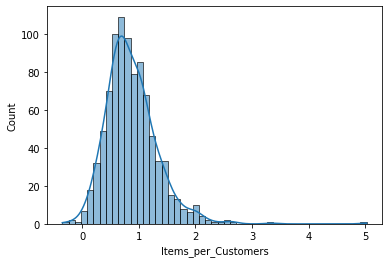

In [530]:
sns.histplot(data['Items_per_Customers'], kde=True)

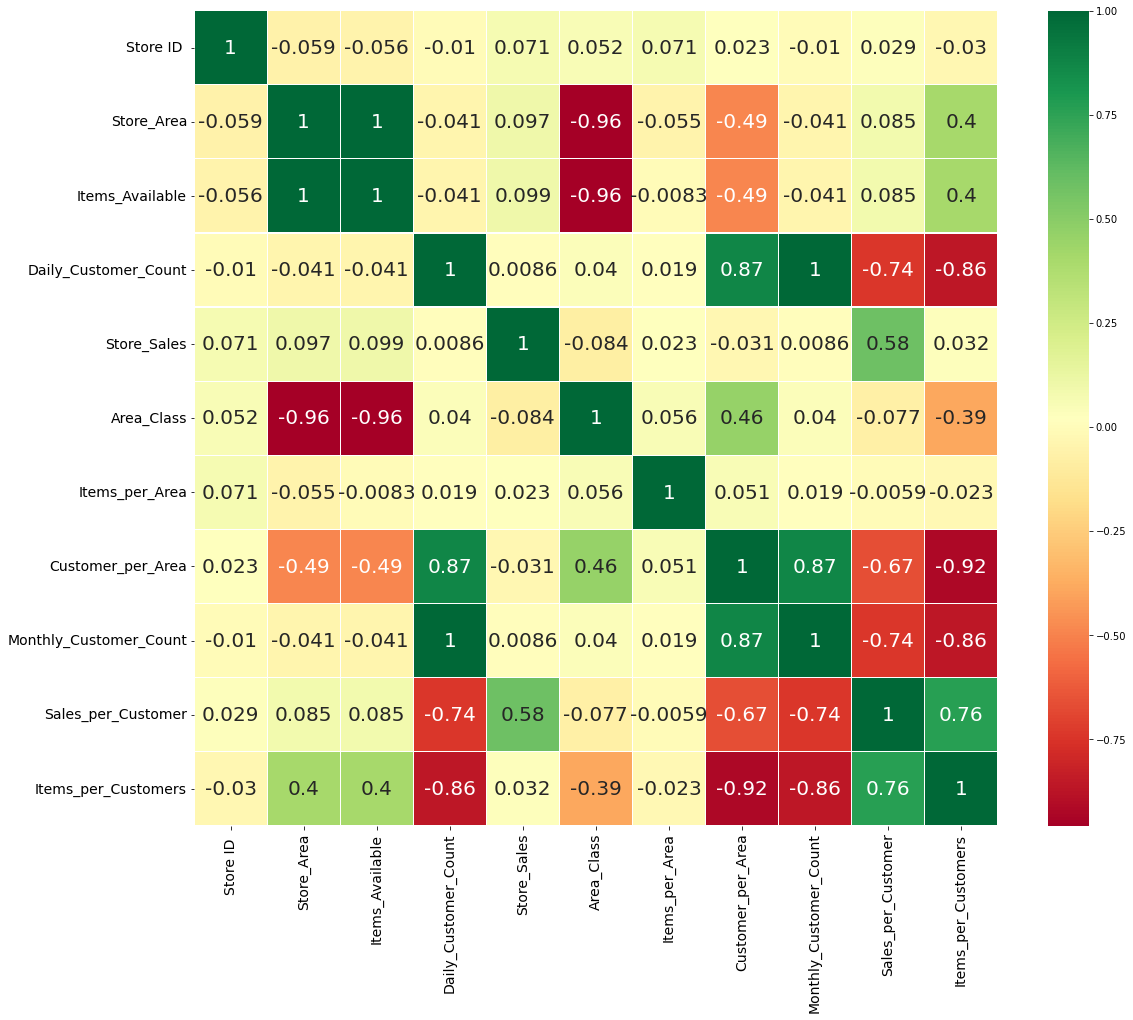

In [531]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

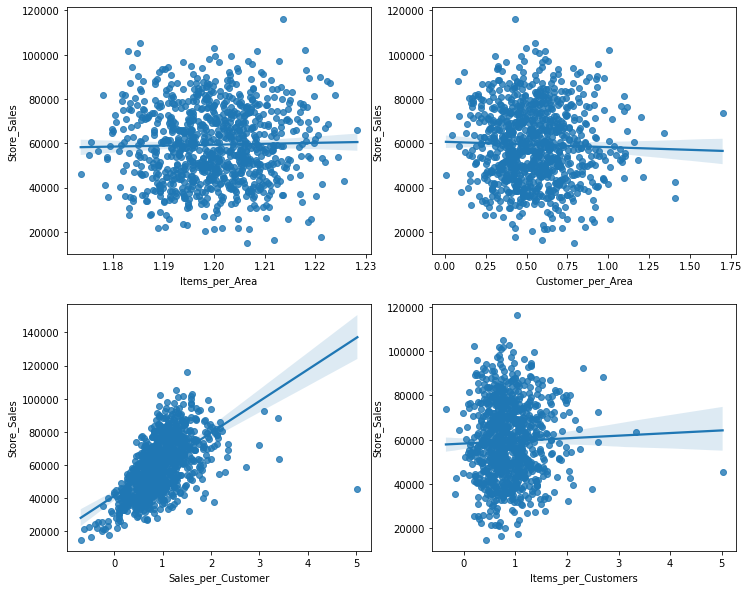

In [532]:
f, ax = plt.subplots(2,2,figsize=(12,10))
sns.regplot(x=data['Items_per_Area'], y=data['Store_Sales'], ax=ax[0,0])
sns.regplot(x=data['Customer_per_Area'], y=data['Store_Sales'], ax=ax[0,1])
sns.regplot(x=data['Sales_per_Customer'], y=data['Store_Sales'], ax=ax[1,0])
sns.regplot(x=data['Items_per_Customers'], y=data['Store_Sales'], ax=ax[1,1])
plt.show()

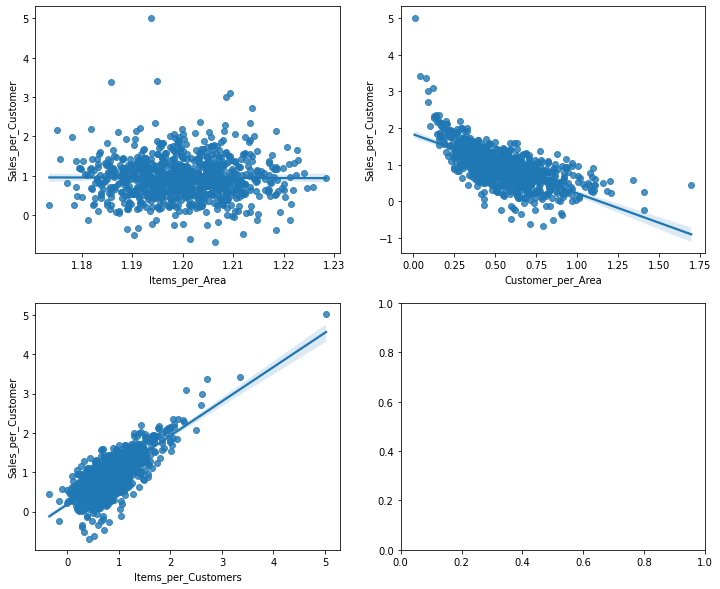

In [533]:
f, ax = plt.subplots(2,2,figsize=(12,10))
sns.regplot(x=data['Items_per_Area'], y=data['Sales_per_Customer'], ax=ax[0,0])
sns.regplot(x=data['Customer_per_Area'], y=data['Sales_per_Customer'], ax=ax[0,1])
sns.regplot(x=data['Items_per_Customers'], y=data['Sales_per_Customer'], ax=ax[1,0])
plt.show()

위 그래프에서 단위 면적당 이용자수가 적고, 이용자수 한 명당 구매 가능한 품목이 많으면 이용자 1명당 판매액이 늘어날 것 같다.

In [534]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Store ID                896 non-null    int64   
 1   Store_Area              896 non-null    int64   
 2   Items_Available         896 non-null    int64   
 3   Daily_Customer_Count    896 non-null    int64   
 4   Store_Sales             896 non-null    int64   
 5   Area_level              896 non-null    category
 6   Area_Class              896 non-null    int64   
 7   Items_per_Area          896 non-null    float64 
 8   Customer_per_Area       896 non-null    float64 
 9   Monthly_Customer_Count  896 non-null    int64   
 10  Sales_per_Customer      896 non-null    float64 
 11  Items_per_Customers     896 non-null    float64 
dtypes: category(1), float64(4), int64(7)
memory usage: 78.3 KB


In [535]:
data['Customer_Class']=pd.qcut(data['Sales_per_Customer'],5)
data.groupby(['Customer_Class'])['Store_Sales'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Store_Sales
Customer_Class,
"(-0.689, 0.551]",41748.333333
"(0.551, 0.809]",54159.441341
"(0.809, 1.039]",60703.016760
"(1.039, 1.304]",67501.061453
"(1.304, 5.021]",72743.016760


In [536]:
data['Rich_Customer'] = 1
data.loc[data['Sales_per_Customer']< 0.551, 'Rich_Customer'] = 5
data.loc[(data['Sales_per_Customer']>= 0.551)&(data['Sales_per_Customer']<0.809), 'Rich_Customer'] = 4
data.loc[(data['Sales_per_Customer']>=0.809)&(data['Sales_per_Customer']<1.039), 'Rich_Customer'] = 3
data.loc[(data['Sales_per_Customer']>=1.039)&(data['Sales_per_Customer']<1.304), 'Rich_Customer'] = 2
data.loc[(data['Sales_per_Customer']>=1.304)&(data['Sales_per_Customer']<5.021), 'Rich_Customer'] = 1

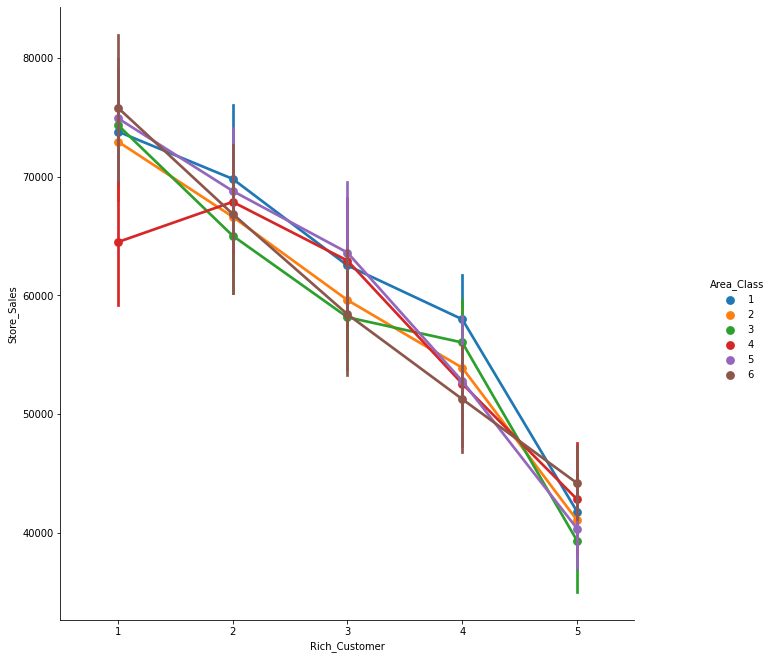

In [537]:

sns.catplot(x='Rich_Customer',y='Store_Sales',  data=data, hue='Area_Class',kind='point')
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()


- z-score 이상치 제거

In [538]:
#z-score 이상치 제거 
#rich_5
outlier = []
rich_5 = data['Store_Sales'][data['Rich_Customer']==5]
for i in rich_5:
  z = (i-np.mean(rich_5))/np.std(rich_5)
  if z > 3:
    outlier.append(i)

print(outlier)

[]


In [539]:
#rich_1
outlier = []
rich_1 = data['Store_Sales'][data['Rich_Customer']==1]
for i in rich_1:
  z = (i-np.mean(rich_1))/np.std(rich_1)
  if z > 3:
    outlier.append(i)

print(outlier)

[]


- IQR 이상치 제거

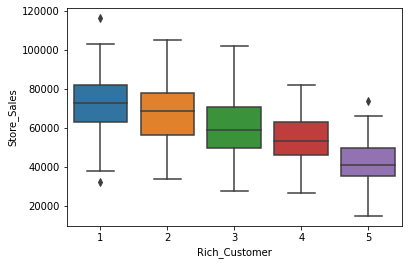

In [540]:
sns.boxplot(x='Rich_Customer',y='Store_Sales', data=data)

In [541]:
data_rich_5 = data['Store_Sales'][data['Rich_Customer']==5]
data_rich_1 = data['Store_Sales'][data['Rich_Customer']==1]

In [542]:
# Rich_Customer 5에 대한 IQR 이상치 확인
q25, q75 = np.percentile(data_rich_5, 25), np.percentile(data_rich_5, 75)
iqr = q75 - q25
cut_off = 1.5 * iqr
lower, upper = q25 - cut_off, q75 + cut_off

In [543]:
data['Rich_5_upper']=(data['Store_Sales'][data['Rich_Customer']==5] > upper)

In [544]:
data['Rich_5_lower']= data['Store_Sales'][data['Rich_Customer']==5] < lower

In [545]:
# Rich_Customer 1에 대한 IQR 이상치 확인
q25, q75 = np.percentile(data_rich_1, 25), np.percentile(data_rich_1, 75)
iqr = q75 - q25
cut_off = 1.5 * iqr
lower, upper = q25 - cut_off, q75 + cut_off

In [546]:
data['Rich_1_lower']=(data['Store_Sales'][data['Rich_Customer']==1] < lower)
data['Rich_1_upper']=data['Store_Sales'][data['Rich_Customer']==1] > upper

In [547]:
# True인 값이 있는 인덱스 출력

print(data[data['Rich_5_upper']==True].index)
print(data[data['Rich_5_lower']==True].index)
print(data[data['Rich_1_upper']==True].index)
print(data[data['Rich_1_lower']==True].index)

Int64Index([848], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([649], dtype='int64')
Int64Index([185], dtype='int64')


In [548]:
# 인덱스 벌호로 이상치를 평균으로 바꿔줌

data.iloc[848, 4] = data_rich_5.mean()
data.iloc[649, 4] = data_rich_1.mean()
data.iloc[185, 4] = data_rich_1.mean()

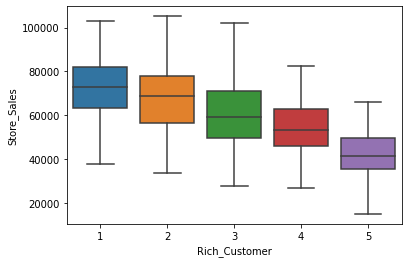

In [549]:
sns.boxplot(x='Rich_Customer',y='Store_Sales', data=data)

- vif를 이용해 다중공선성 확인

In [550]:
#vif 이용해 다중공선성 확인
from patsy import dmatrices
import pandas.util.testing as tm
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('Store_Sales ~ Rich_Customer + Items_per_Customers + Sales_per_Customer + Items_per_Area', data, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,16346.165137,Intercept
1,4.849503,Rich_Customer
2,2.450441,Items_per_Customers
3,6.895868,Sales_per_Customer
4,1.001087,Items_per_Area


vif < 10 이라서 items_per_customers, sales_per_customer, items_per_area는 다중공선성이 없다고 판단 된다.

- 필요없는 컬럼들 drop

In [551]:
columns = [ 'Store_Area', 'Area_level', 'Customer_Class', 'Rich_5_upper', 'Rich_5_lower', 'Rich_1_upper', 'Rich_1_lower', 'Monthly_Customer_Count']
len(columns)

8

In [552]:
data = data.drop( columns, axis=1)

In [553]:
data = data.drop('Store ID ', axis=1)

In [554]:
data.head()

,Items_Available,Daily_Customer_Count,Store_Sales,Area_Class,Items_per_Area,Customer_per_Area,Sales_per_Customer,Items_per_Customers,Rich_Customer
0,1961,530,66490.0,2,1.182037,0.319470,1.430732,1.308333,1
1,1752,210,39820.0,4,1.199179,0.143737,1.843820,2.121406,1
2,1609,720,54010.0,5,1.200746,0.537313,0.916476,0.804117,3
3,1748,620,53730.0,4,1.204686,0.427292,1.060810,1.036508,2
4,2111,450,46620.0,1,1.192655,0.254237,1.239340,1.545669,2


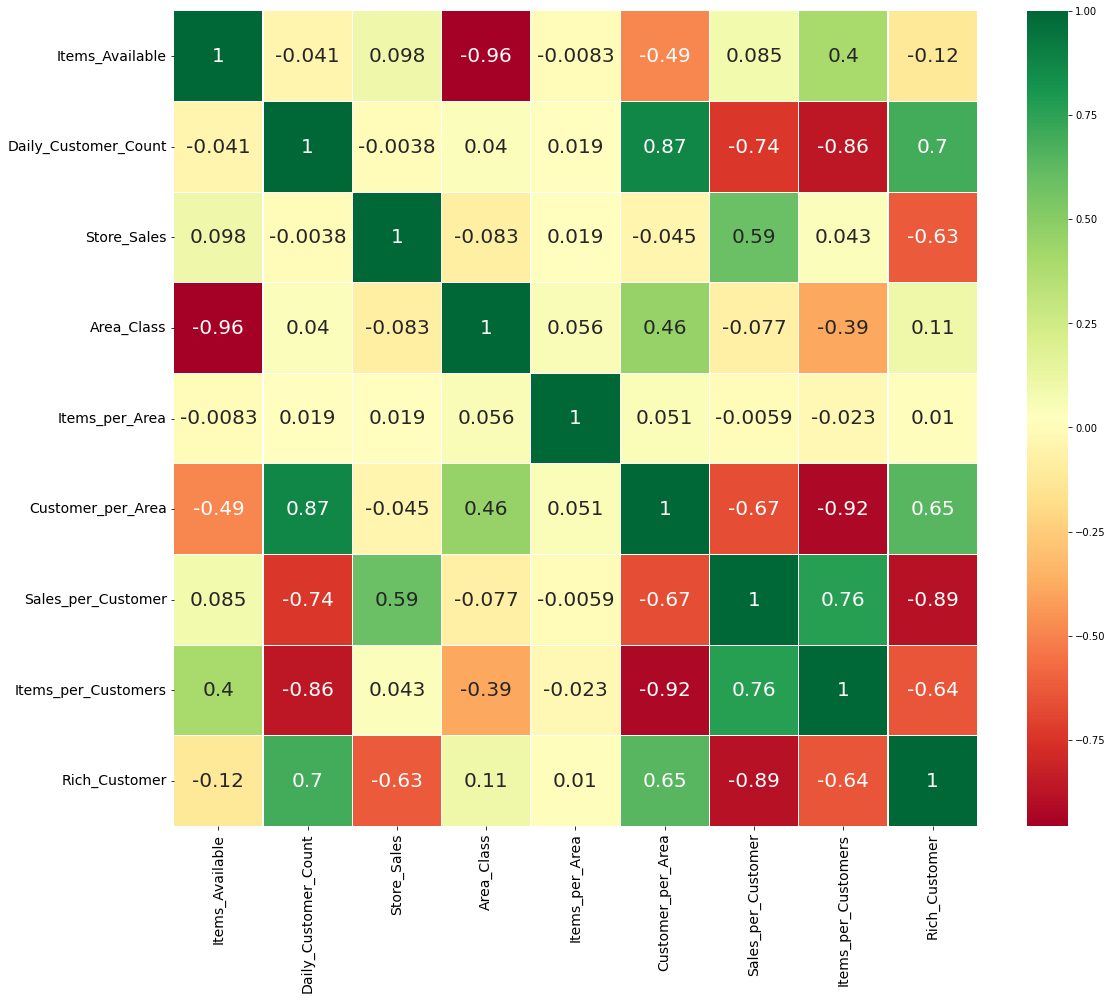

In [555]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- Area_Class, Rich_Customer One-hot-encoding

In [556]:
data = pd.get_dummies(data, columns=['Area_Class'], prefix = 'Area_Class')
data = pd.get_dummies(data, columns=['Rich_Customer'], prefix = 'Rich_Customer')

In [557]:
data.head()

,Items_Available,Daily_Customer_Count,Store_Sales,Items_per_Area,Customer_per_Area,Sales_per_Customer,Items_per_Customers,Area_Class_1,Area_Class_2,Area_Class_3,Area_Class_4,Area_Class_5,Area_Class_6,Rich_Customer_1,Rich_Customer_2,Rich_Customer_3,Rich_Customer_4,Rich_Customer_5
0,1961,530,66490.0,1.182037,0.319470,1.430732,1.308333,0,1,0,0,0,0,1,0,0,0,0
1,1752,210,39820.0,1.199179,0.143737,1.843820,2.121406,0,0,0,1,0,0,1,0,0,0,0
2,1609,720,54010.0,1.200746,0.537313,0.916476,0.804117,0,0,0,0,1,0,0,0,1,0,0
3,1748,620,53730.0,1.204686,0.427292,1.060810,1.036508,0,0,0,1,0,0,0,1,0,0,0
4,2111,450,46620.0,1.192655,0.254237,1.239340,1.545669,1,0,0,0,0,0,0,1,0,0,0


In [558]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Items_Available       896 non-null    int64  
 1   Daily_Customer_Count  896 non-null    int64  
 2   Store_Sales           896 non-null    float64
 3   Items_per_Area        896 non-null    float64
 4   Customer_per_Area     896 non-null    float64
 5   Sales_per_Customer    896 non-null    float64
 6   Items_per_Customers   896 non-null    float64
 7   Area_Class_1          896 non-null    uint8  
 8   Area_Class_2          896 non-null    uint8  
 9   Area_Class_3          896 non-null    uint8  
 10  Area_Class_4          896 non-null    uint8  
 11  Area_Class_5          896 non-null    uint8  
 12  Area_Class_6          896 non-null    uint8  
 13  Rich_Customer_1       896 non-null    uint8  
 14  Rich_Customer_2       896 non-null    uint8  
 15  Rich_Customer_3       8

## 학습 및 예측

- train, test 나누기

In [559]:
y = data['Store_Sales']
data = data.drop('Store_Sales', axis=1)

In [560]:
data.shape, y.shape, 

((896, 17), (896,))

In [561]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=27)

- 하이퍼 파라미터 튜닝 함수 정의

In [562]:
from sklearn.model_selection import GridSearchCV

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, 
                              param_grid=param_grid, 
                              scoring = 'neg_mean_squared_error', # -MSE 값으로 scoring을 하도록 설정 해줌
                              cv = 5, 
                              verbose = verbose, 
                              n_jobs = n_jobs )
    grid_model.fit(train, y)
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    df = pd.DataFrame(params)
    df['score'] = score

    df['RMSLE'] = np.sqrt(-1 * df['score'])  # -MSE값에 1을 곱하고 루트를 씌워서 RMSLE값을 계산해줌
    df = df.sort_values('RMSLE')  #값 오름차순 정렬

    return df

- rmsle 계산 함수

In [563]:
def rmsle(y_true, y_pred):

    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))

    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

- 사용 할 모델들 불러오기


In [564]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

## LinearRegression

In [565]:
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print(rmsle(y_test, lr_pred))

1.020813822532277


In [566]:
#MinMax
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 lr 학습
lr_model.fit(X_train_scaled, y_train)
lr_pred_mm = lr_model.predict(X_test_scaled)
print(rmsle(y_test, lr_pred_mm))

1.020802212888849


In [567]:
#StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로  학습
lr_model.fit(X_train_scaled, y_train)
lr_pred_stds = lr_model.predict(X_test_scaled)
print(rmsle(y_test, lr_pred_stds))

1.020813822532277


In [568]:
#robust 

scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
lr_model.fit(X_train_scaled, y_train)
lr_pred_rob = lr_model.predict(X_test_scaled)
print(rmsle(y_test, lr_pred_rob))

1.020813822532277


In [569]:
#QuantileTransformer 
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
lr_model.fit(X_train_scaled, y_train)
lr_pred_qtf = lr_model.predict(X_test_scaled)
print(rmsle(y_test, lr_pred_qtf))

0.14684818555980647


In [570]:
#PowerTransformer 
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
lr_model.fit(X_train_scaled, y_train)
lr_pred_ptf = lr_model.predict(X_test_scaled)
print(rmsle(y_test, lr_pred_ptf))

1.021657463842892


lr_model (non_scaling) rmsle : 1.020795296946671 \
lr_model (minmax) rmsle : 1.020783750336443 \
lr_model (standard scaler) rmsle : 1.0207952969466665 \
lr_model (robust) rmsle : 1.0207952969466665 \
lr_model (QuantileTransformer) rmsle : 0.14517625409894994 \
lr_model (PowerTransformer) rmsle : 1.0219409515120705


- lgbm은 데이터가 10,000개 이하이면 과적합이 발생 할 가능성이 높기 때문에 데이터가 너무 적은 슈퍼마켓 데이터에서는 사용하지 못할 것 같다.

## xgboost

In [571]:
xgb_params = {'n_estimators' : [100,200,300], 'max_depth' : [5,10], 'learning_rate' : [0.01, 0.1]}

xgb_model = XGBRegressor(random_state=27, objective='reg:squarederror')
my_GridSearch(xgb_model, X_train, y_train, xgb_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,learning_rate,max_depth,n_estimators,score,RMSLE
8,0.10,5,300,-1.527647e+07,3908.512109
7,0.10,5,200,-1.534968e+07,3917.867344
6,0.10,5,100,-1.577539e+07,3971.825037
11,0.10,10,300,-1.635437e+07,4044.053798
9,0.10,10,100,-1.635444e+07,4044.062566
10,0.10,10,200,-1.635692e+07,4044.368361
5,0.01,10,300,-2.942296e+07,5424.293289
2,0.01,5,300,-3.053012e+07,5525.406828
4,0.01,10,200,-1.013035e+08,10064.963118
1,0.01,5,200,-1.024093e+08,10119.747623


In [572]:
xgb_model = XGBRegressor(random_state=27, objective='reg:squarederror', learning_rate=0.1, max_depth =5, n_estimators=300)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print(rmsle(y_test, xgb_pred))

0.059798645706579126


In [573]:
#MinMax
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 학습
xgb_model.fit(X_train_scaled, y_train)
xgb_pred_mm = xgb_model.predict(X_test_scaled)
print(rmsle(y_test, xgb_pred_mm))

0.059798645706579126


In [574]:
#Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 학습
xgb_model.fit(X_train_scaled, y_train)
xgb_pred_stds = xgb_model.predict(X_test_scaled)
print(rmsle(y_test, xgb_pred_stds))

0.057188537606125765


In [575]:
#robust scaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
xgb_model.fit(X_train_scaled, y_train)
xgb_pred_rs = xgb_model.predict(X_test_scaled)
print(rmsle(y_test, xgb_pred_rs))

0.05973297650141527


In [576]:
#QuantileTransformer
scaler = QuantileTransformer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
xgb_model.fit(X_train_scaled, y_train)
xgb_pred_qtf = xgb_model.predict(X_test_scaled)
print(rmsle(y_test, xgb_pred_qtf))

0.05999895052045664


In [577]:
#PowerTransformer
scaler = PowerTransformer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
xgb_model.fit(X_train_scaled, y_train)
xgb_pred_ptf = xgb_model.predict(X_test_scaled)
print(rmsle(y_test, xgb_pred_ptf))

0.059798645706579126


xgb_model (non_scaling) rmsle : 0.05604956168170322 \
xgb_model (minmax) rmsle : 0.05605237387825674 \
xgb_model (standard scaler) rmsle : 0.05454630436205783 \
xgb_model (Robust scaler) rmsle : 0.05596021350524051 \
xgb_model (QuantileTransformer) rmsle : 0.05668595794469905 \
xgb_model (PowerTransformer) rmsle : 0.05604968665942247

## Random Forest

In [578]:
rf_params = {'n_estimators' : [100,200,300], 'max_depth' : [5,10,15]}

rf_model = RandomForestRegressor(random_state=27)
my_GridSearch(rf_model, X_train, y_train, rf_params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


,max_depth,n_estimators,score,RMSLE
8,15,300,-1.478525e+07,3845.159210
7,15,200,-1.478543e+07,3845.182319
6,15,100,-1.494461e+07,3865.825907
5,10,300,-1.505095e+07,3879.555624
3,10,100,-1.506517e+07,3881.388189
4,10,200,-1.511181e+07,3887.390902
2,5,300,-2.900554e+07,5385.679045
1,5,200,-2.912602e+07,5396.852632
0,5,100,-2.951888e+07,5433.127945


In [579]:
rf_model = RandomForestRegressor(n_estimators=300, max_depth = 15, random_state=27)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(rmsle(y_test, rf_pred))

0.0719466869778384


In [580]:
#minmax
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
rf_model.fit(X_train_scaled, y_train)
rf_pred_mm = rf_model.predict(X_test_scaled)
print(rmsle(y_test, rf_pred_mm))

0.0720703962055038


In [581]:
#standardscaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
rf_model.fit(X_train_scaled, y_train)
rf_pred_stds = rf_model.predict(X_test_scaled)
print(rmsle(y_test, rf_pred_stds))

0.07216458351924517


In [582]:
#Robust
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
rf_model.fit(X_train_scaled, y_train)
rf_pred_rb = rf_model.predict(X_test_scaled)
print(rmsle(y_test, rf_pred_rb))

0.07210409214468008


In [583]:
#QuantileTransformer
scaler = QuantileTransformer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
rf_model.fit(X_train_scaled, y_train)
rf_pred_qtf = rf_model.predict(X_test_scaled)
print(rmsle(y_test, rf_pred_qtf))

0.071281433097657


In [584]:
#PowerTransformer
scaler = PowerTransformer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
rf_model.fit(X_train_scaled, y_train)
rf_pred_ptf = rf_model.predict(X_test_scaled)
print(rmsle(y_test, rf_pred_ptf))

0.07217969163215124


rf_model (non_scaling) rmsle : 0.072136117446655 \
rf_model (minmax) rmsle : 0.07225052324425107 \
rf_model (StandardScaler) rmsle : 0.07230269688740842 \
rf_model (Robust Scaler) rmsle : 0.07227966259966162 \
rf_model (QuantileTransformer) rmsle : 0.07139774299948798 \
rf_model (PowerTransformer) rmsle : 0.07227820692480913

## KNeighborsRegressor

In [585]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors = 5, weights = "distance")
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print(rmsle(y_test, knn_pred))

0.35689154073157187


In [586]:
#minmax
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
knn_model.fit(X_train_scaled, y_train)
knn_pred_mm = knn_model.predict(X_test_scaled)
print(rmsle(y_test, knn_pred_mm))

0.18193199320071968


In [587]:
#standardscaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
knn_model.fit(X_train_scaled, y_train)
knn_pred_stds = knn_model.predict(X_test_scaled)
print(rmsle(y_test, knn_pred_stds))

0.16719507501538297


In [588]:
#robust
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
knn_model.fit(X_train_scaled, y_train)
knn_pred_rb = knn_model.predict(X_test_scaled)
print(rmsle(y_test, knn_pred_rb))

0.1597950919913181


In [589]:
#QuantileTransformer
scaler = QuantileTransformer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
knn_model.fit(X_train_scaled, y_train)
knn_pred_qtf = knn_model.predict(X_test_scaled)
print(rmsle(y_test, knn_pred_qtf))

0.18609198027844479


In [591]:
#PowerTransformer
scaler = PowerTransformer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 학습
knn_model.fit(X_train_scaled, y_train)
knn_pred_ptf = knn_model.predict(X_test_scaled)
print(rmsle(y_test, knn_pred_ptf))

0.16443310026379276


knn_model (non_scaling) rmsle : 0.3577861283062541 \
knn_model (minmax) rmsle : 0.18148819028447583 \
knn_model (StandardScaler) rmsle : 0.16652977475577024 \
knn_model (Robust Scaler) rmsle : 0.15915430396580604 \
knn_model (QuantileTransformer) rmsle : 0.18631497980225795 \
knn_model (PowerTransformer) rmsle : 0.16443310026379276